In [1]:
#For Data Set Preparation we need this numpy and pandas
import numpy as np
import pandas as pd

In [2]:
#Load The Dataset
data = pd.read_csv("Spam Email Detection - spam.csv")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
#Checking Missing Value
data.isnull().isnull().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [5]:
#To extract V1 & V2
df_data = data[["v1","v2"]]

In [6]:
df_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
import matplotlib.pyplot as plt

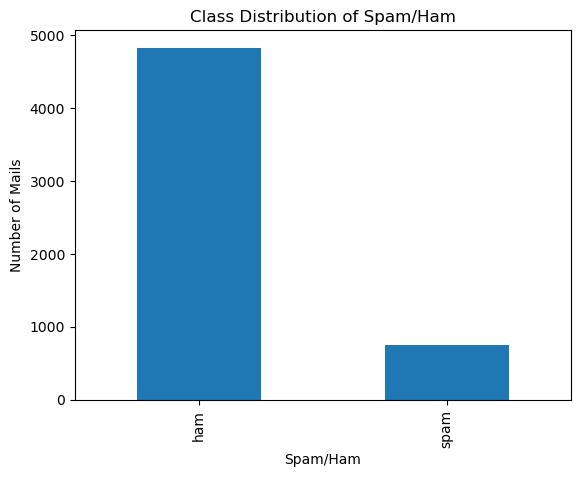

In [8]:
# Create a bar plot of the class distribution
class_counts = df_data['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [9]:
from collections import Counter
import re
from tqdm import tqdm

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Ayan
[nltk_data]     Pramanik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [11]:
# import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ayan
[nltk_data]     Pramanik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# from tqdm import tqdm
# import re

In [13]:
from nltk.stem import PorterStemmer


In [14]:
%%time

tqdm.pandas()

df_data['cleaned_text'] = df_data['v2'].progress_apply(clean_text)

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:38<00:00, 145.33it/s]

Wall time: 38.4 s



<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
from sklearn.feature_extraction.text import CountVectorizer    
# #CountVectorizer is a powerful tool from Scikit-learn library that speeds up this feature extraction process from text.

In [22]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df_data['cleaned_text']).toarray()
y = df_data['v1']

In [23]:
x,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 5567    spam
 5568     ham
 5569     ham
 5570     ham
 5571     ham
 Name: v1, Length: 5572, dtype: object)

## Model Building

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
classifier = SVC(kernel='rbf',random_state=0)

In [27]:
classifier.fit(x_train,y_train)      #Fitting The Model

SVC(random_state=0)

In [28]:
#Model Evaluation
classifier.predict(x_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [30]:
comment = ["Ok lar...Joking wif u oni..."]
vect = cv.transform(comment).toarray()

In [31]:
classifier.predict(vect)

array(['ham'], dtype=object)

In [32]:
comment1 = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to eceive entry question(std txt rate)T&C's apply 08452810075over18's"]
vect = cv.transform(comment1).toarray()


In [33]:
classifier.predict(vect)

array(['spam'], dtype=object)

In [34]:
#Accuracy
print("Accuracy of Model",classifier.score(x_test,y_test)*100,"%")

Accuracy of Model 97.4156496769562 %
